# Natural Language Is Fun
- based on https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e

## Natural Language Processing/Computational Linguistics?
- The study of human languages and how they can be represented computationally and analyzed and generated algorithmically
    - The cat is on the mat. --> on (mat, cat)
    - on (mat, cat) --> The cat is on the mat

- Studying NLP involves studying natural language, formal representations, and algorithms for their manipulation

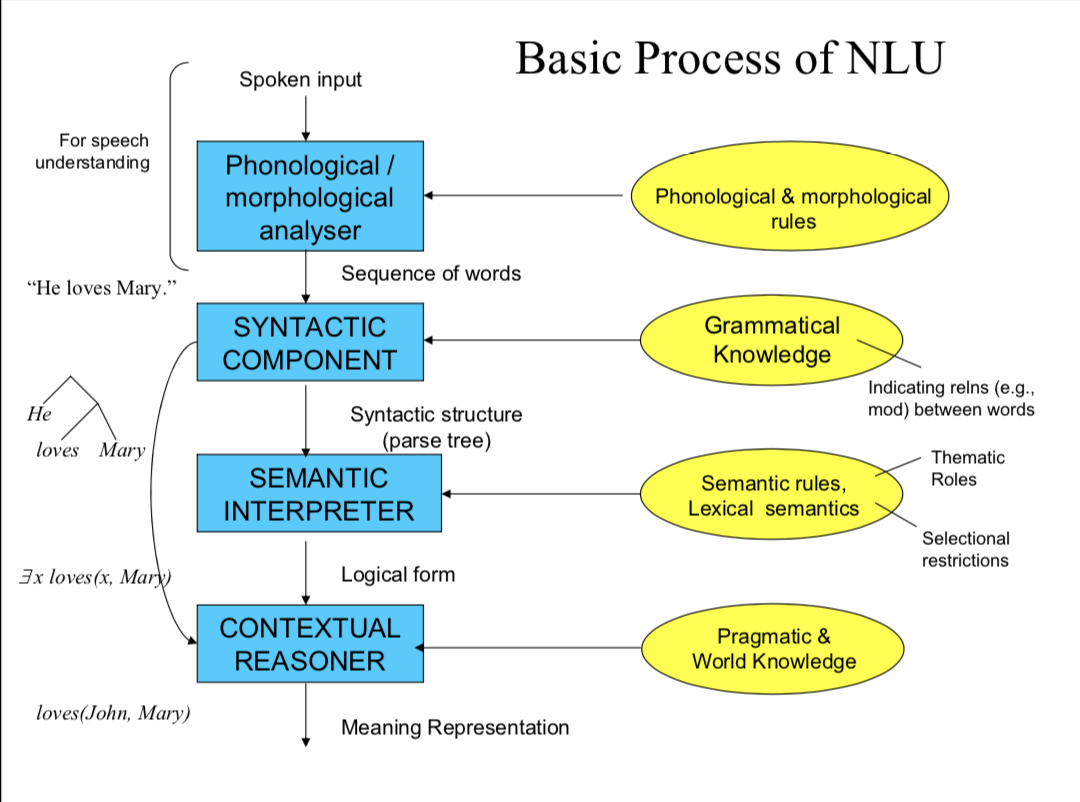

## Understanding Raw Text
![](https://miro.medium.com/max/2000/1*CtR2lIHDkhB9M8Jt4irSyg.gif)

- *Natural Language Processing*, or NLP, is the sub-field of AI that is focused on enabling computers to understand and process human languages.

## Can Computers Understand Language?
- As long as computers have been around, programmers have been trying to write programs that understand languages like English. The reason is pretty obvious — humans have been writing things down for thousands of years and it would be really helpful if a computer could read and understand all that data.
- Computers can’t yet truly understand English in the way that humans do — but they can already do a lot! In certain limited areas, what you can do with NLP already seems like magic. You might be able to save a lot of time by applying NLP techniques to your own projects.
- And even better, the latest advances in NLP are easily accessible through open source Python libraries like spaCy, textacy, and neuralcoref. What you can do with just a few lines of python is amazing.


## Extracting Meaning from Text is Hard
- The process of reading and understanding English is very complex — and that’s not even considering that English doesn’t follow logical and consistent rules. For example, what does this news headline mean?
    - *“Environmental regulators grill business owner over illegal coal fires.”
- Are the regulators questioning a business owner about burning coal illegally? Or are the regulators literally cooking the business owner? As you can see, parsing English with a computer is going to be complicated.
- Doing anything complicated in machine learning usually means building a pipeline. The idea is to break up your problem into very small pieces and then use machine learning to solve each smaller piece separately. Then by chaining together several machine learning models that feed into each other, you can do very complicated things.
- And that’s exactly the strategy we are going to use for NLP. We’ll break down the process of understanding English into small chunks and see how each one works.

## Building an NLP Pipeline, Step-by-Step
- Let’s look at a piece of text from Wikipedia:
   - *London is the capital and most populous city of England and the United Kingdom. Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia. It was founded by the Romans, who named it Londinium.*

- This paragraph contains several useful facts. It would be great if a computer could read this text and understand that *London is a city, London is located in England, London was settled by Romans and so on*. But to get there, we have to first teach our computer the most basic concepts of written language and then move up from there.

### Step 1: Sentence Segmentation
- The first step in the pipeline is to break the text apart into separate sentences. That gives us this:
    - *“London is the capital and most populous city of England and the United Kingdom.”
    - *“Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia.”*
    - *“It was founded by the Romans, who named it Londinium.”*
- We can assume that each sentence in English is a separate thought or idea. It will be a lot easier to write a program to understand a single sentence than to understand a whole paragraph.
- Coding a Sentence Segmentation model can be as simple as splitting apart sentences whenever you see a punctuation mark. But modern NLP pipelines often use more complex techniques that work even when a document isn’t formatted cleanly.

### Step 2: Word Tokenization
- Now that we’ve split our document into sentences, we can process them one at a time. Let’s start with the first sentence from our document:
    - *“London is the capital and most populous city of England and the United Kingdom.”*
- The next step in our pipeline is to break this sentence into separate words or tokens. This is called tokenization. This is the result:
    - *“London”, “is”, “ the”, “capital”, “and”, “most”, “populous”, “city”, “of”, “England”, “and”, “the”, “United”, “Kingdom”, “.”*
- Tokenization is easy to do in English. We’ll just split apart words whenever there’s a space between them. And we’ll also treat punctuation marks as separate tokens since punctuation also has meaning.


### Step 3: Predicting Parts of Speech for Each Token
- Next, we’ll look at each token and try to guess its part of speech — whether it is a noun, a verb, an adjective and so on. Knowing the role of each word in the sentence will help us start to figure out what the sentence is talking about.
- We can do this by feeding each word (and some extra words around it for context) into a pre-trained part-of-speech classification model:
![](https://miro.medium.com/max/2058/1*u7Z1B1TIYe68V8lS2f8GNg.png)
- The part-of-speech model was originally trained by feeding it millions of English sentences with each word’s part of speech already tagged and having it learn to replicate that behavior.
- Keep in mind that the model is completely based on statistics — it doesn’t actually understand what the words mean in the same way that humans do. It just knows how to guess a part of speech based on similar sentences and words it has seen before.
- After processing the whole sentence, we’ll have a result like this:
![](https://miro.medium.com/max/2436/1*O0gIbvPd-weZw4IGmA5ywQ.png)
- With this information, we can already start to glean some very basic meaning. For example, we can see that the nouns in the sentence include “London” and “capital”, so the sentence is probably talking about London.

### Step 4: Text Lemmatization
- In English (and most languages), words appear in different forms. Look at these two sentences:
    - *I had a pony.*
    - *I had two ponies.*
- Both sentences talk about the noun pony, but they are using different inflections. When working with text in a computer, it is helpful to know the base form of each word so that you know that both sentences are talking about the same concept. Otherwise the strings **“pony”** and **“ponies”** look like two totally different words to a computer.
- In NLP, we call finding this process *lemmatization* — figuring out the most basic form or lemma of each word in the sentence.
- The same thing applies to verbs. We can also lemmatize verbs by finding their root, unconjugated form. So **“I had two ponies”** becomes **“I [have] two [pony].”**
- *Lemmatization* is typically done by having a look-up table of the lemma forms of words based on their part of speech and possibly having some custom rules to handle words that you’ve never seen before.
- Here’s what our sentence looks like after lemmatization adds in the root form of our verb:
![](https://miro.medium.com/max/2436/1*EgYJsyjBNk074TQf87_CqA.png)

### Step 5: Identifying Stop Words
- Next, we want to consider the importance of a each word in the sentence. English has a lot of filler words that appear very frequently like “and”, “the”, and “a”. When doing statistics on text, these words introduce a lot of noise since they appear way more frequently than other words. Some NLP pipelines will flag them as stop words —that is, words that you might want to filter out before doing any statistical analysis.
- Here’s how our sentence looks with the stop words grayed out:
![](https://miro.medium.com/max/2436/1*Zgq1nK_71AzX1CaknB89Ww.png)
- Stop words are usually identified by just by checking a hardcoded list of known stop words. But there’s no standard list of stop words that is appropriate for all applications. The list of words to ignore can vary depending on your application.
- For example if you are building a rock band search engine, you want to make sure you don’t ignore the word *“The”*. Because not only does the word *“The”* appear in a lot of band names, there’s a famous 1980’s rock band called The The!

### Step 6: Dependency Parsing
- The next step is to figure out how all the words in our sentence relate to each other. This is called dependency parsing.
- The goal is to build a tree that assigns a single **parent** word to each word in the sentence. The root of the tree will be the main verb in the sentence. Here’s what the beginning of the parse tree will look like for our sentence:
![](https://miro.medium.com/max/2574/1*nteaQRxNNSXMlAnT31iXjw.png)
- But we can go one step further. In addition to identifying the parent word of each word, we can also predict the type of relationship that exists between those two words:
![](https://miro.medium.com/max/2574/1*onc_4Mnq2L7cetMAowYAbA.png)

- This parse tree shows us that the subject of the sentence is the noun *“London”* and it has a *“be”* relationship with “capital”.
- We finally know something useful — London is a capital! And if we followed the complete parse tree for the sentence (beyond what is shown), we would even found out that London is the capital of the United Kingdom.
- Just like how we predicted parts of speech earlier using a machine learning model, dependency parsing also works by feeding words into a machine learning model and outputting a result. 
- But parsing word dependencies is particularly complex task and would require an entire article to explain in any detail. If you are curious how it works, a great place to start reading is Matthew Honnibal’s excellent article *“Parsing English in 500 Lines of Python”*.
- But despite a note from the author in 2015 saying that this approach is now standard, it’s actually out of date and not even used by the author anymore. 
- In 2016, Google released a new dependency parser called *Parsey McParseface* which outperformed previous benchmarks using a new deep learning approach which quickly spread throughout the industry. Then a year later, they released an even newer model called ParseySaurus which improved things further. In other words, parsing techniques are still an active area of research and constantly changing and improving.
- It’s also important to remember that many English sentences are ambiguous and just really hard to parse. In those cases, the model will make a guess based on what parsed version of the sentence seems most likely but it’s not perfect and sometimes the model will be embarrassingly wrong. But over time our NLP models will continue to get better at parsing text in a sensible way.
- Want to try out dependency parsing on your own sentence? There’s a great interactive demo from the spaCy team here.

### Step 6b: Finding Noun Phrases
- So far, we’ve treated every word in our sentence as a separate entity. But sometimes it makes more sense to group together the words that represent a single idea or thing. We can use the information from the dependency parse tree to automatically group together words that are all talking about the same thing.
- For example, instead of this:
![](https://miro.medium.com/max/2436/1*EgYJsyjBNk074TQf87_CqA.png)
<br>
- We can group the noun phrases to generate this:

![](https://miro.medium.com/max/1974/1*5dlHkuUP3pG8ktlR-wPliw.png)
<br>
<br>
- Whether or not we do this step depends on our end goal. But it’s often a quick and easy way to simplify the sentence if we don’t need extra detail about which words are adjectives and instead care more about extracting complete ideas.

### Step 7: Named Entity Recognition (NER)
- Now that we’ve done all that hard work, we can finally move beyond grade-school grammar and start actually extracting ideas.
<br>

- In our sentence, we have the following nouns:

![](https://miro.medium.com/max/2208/1*JMXGOrdx4oQsfZC5t-Ksgw.png)
<br>
- Some of these nouns present real things in the world. For example, *“London”*, *“England”* and *“United Kingdom”* represent physical places on a map. It would be nice to be able to detect that! With that information, we could automatically extract a list of real-world places mentioned in a document using NLP.
- The goal of Named Entity Recognition, or NER, is to detect and label these nouns with the real-world concepts that they represent. Here’s what our sentence looks like after running each token through our NER tagging model:

![](https://miro.medium.com/max/2262/1*x1kwwACli8Fcvjos_6oS-A.png)

- But NER systems aren’t just doing a simple dictionary lookup. Instead, they are using the context of how a word appears in the sentence and a statistical model to guess which type of noun a word represents. A good NER system can tell the difference between “Brooklyn Decker” the person and the place “Brooklyn” using context clues.
- Here are just some of the kinds of objects that a typical NER system can tag:
    - People’s names
    - Company names
    - Geographic locations (Both physical and political)
    - Product names
    - Dates and times
    - Amounts of money
    - Names of events

- NER has tons of uses since it makes it so easy to grab structured data out of text. It’s one of the easiest ways to quickly get value out of an NLP pipeline.
- Want to try out Named Entity Recognition yourself? There’s another great interactive demo from spaCy here.

### Step 8: Coreference Resolution
- At this point, we already have a useful representation of our sentence. We know the parts of speech for each word, how the words relate to each other and which words are talking about named entities.
- However, we still have one big problem. English is full of pronouns — words like he, she, and it. These are shortcuts that we use instead of writing out names over and over in each sentence. 
- Humans can keep track of what these words represent based on context. But our NLP model doesn’t know what pronouns mean because it only examines one sentence at a time.
<br>
- Let’s look at the third sentence in our document:
    - *“It was founded by the Romans, who named it Londinium.”*
<br>
- If we parse this with our NLP pipeline, we’ll know that *“it”* was founded by Romans. But it’s a lot more useful to know that *“London”* was founded by Romans.
- As a human reading this sentence, you can easily figure out that *“it”* means *“London”*. The goal of coreference resolution is to figure out this same mapping by tracking pronouns across sentences. We want to figure out all the words that are referring to the same entity.
- Here’s the result of running coreference resolution on our document for the word *“London”*:
![](https://miro.medium.com/max/1874/1*vGPbWiJqQA65GlwcOYtbKQ.png)

- With coreference information combined with the parse tree and named entity information, we should be able to extract a lot of information out of this document!
<br>
- Coreference resolution is one of the most difficult steps in our pipeline to implement. It’s even more difficult than sentence parsing. Recent advances in deep learning have resulted in new approaches that are more accurate, but it isn’t perfect yet. If you want to learn more about how it works, start here.
<br>
- Want to play with co-reference resolution? Check out this great co-reference resolution demo from Hugging Face.

## Coding the NLP Pipeline in Python
- Here’s an overview of our complete NLP pipeline:

![](https://miro.medium.com/max/4304/1*zHLs87sp8R61ehUoXepWHA.png)

In [ ]:
# Install spaCy 
pip3 install -U spacy

# Download the large English model for spaCy
python3 -m spacy download en_core_web_lg

# Install textacy which will also be useful
pip3 install -U textacy

# Entity Extraction

- Then the code to run an NLP pipeline on a piece of text looks like this:

In [42]:
import spacy

# Load the large English NLP model
nlp = spacy.load('en_core_web_lg')

# The text we want to examine
text = """London is the capital and most populous city of England and 
the United Kingdom.  Standing on the River Thames in the south east 
of the island of Great Britain, London has been a major settlement 
for two millennia. It was founded by the Romans, who named it Londinium.
"""

# Parse the text with spaCy. This runs the entire pipeline.
doc = nlp(text)

# 'doc' now contains a parsed version of text. We can use it to do anything we want!
# For example, this will print out all the named entities that were detected:
for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")

London (GPE)
England (GPE)
the United Kingdom (GPE)
the River Thames (FAC)
Great Britain (GPE)
London (GPE)
two millennia (DATE)
Romans (NORP)
Londinium (PERSON)


In [43]:
import spacy

# Load the large English NLP model
nlp = spacy.load('en_core_web_lg')

# Replace a token with "REDACTED" if it is a name
def replace_name_with_placeholder(token):
    if token.ent_iob != 0 and token.ent_type_ == "PERSON":
        return "[REDACTED] "
    else:
        return token.string

# Loop through all the entities in a document and check if they are names
def scrub(text):
    doc = nlp(text)
    for ent in doc.ents:
        ent.merge()
    tokens = map(replace_name_with_placeholder, doc)
    return "".join(tokens)

s = """
In 1950, Alan Turing published his famous article "Computing Machinery and Intelligence". In 1957, Noam Chomsky’s 
Syntactic Structures revolutionized Linguistics with 'universal grammar', a rule based system of syntactic structures.
"""

print(scrub(s))


In 1950, [REDACTED] published his famous article "Computing Machinery and Intelligence". In 1957, [REDACTED] 
Syntactic Structures revolutionized Linguistics with 'universal grammar', a rule based system of syntactic structures.



## Extracting Facts

In [40]:
import spacy
import textacy.extract

# Load the large English NLP model
nlp = spacy.load('en_core_web_lg')

# The text we want to examine
text = """London is the capital and most populous city of England and  the United Kingdom.  
Standing on the River Thames in the south east of the island of Great Britain, 
London has been a major settlement  for two millennia.  It was founded by the Romans, 
who named it Londinium.
"""

# Parse the document with spaCy
doc = nlp(text)

# Extract semi-structured statements
statements = textacy.extract.semistructured_statements(doc, "London")

# Print the results
print("Here are the things I know about London:")

for statement in statements:
    subject, verb, fact = statement
    print(f" - {fact}")

Here are the things I know about London:
 - the capital and most populous city of England and  the United Kingdom.  

 - a major settlement  for two millennia.  


In [41]:
import spacy
import textacy.extract

# Load the large English NLP model
nlp = spacy.load('en_core_web_lg')

# The text we want to examine
text = """London is [.. shortened for space ..]"""

# Parse the document with spaCy
doc = nlp(text)

# Extract noun chunks that appear
noun_chunks = textacy.extract.noun_chunks(doc, min_freq=3)

# Convert noun chunks to lowercase strings
noun_chunks = map(str, noun_chunks)
noun_chunks = map(str.lower, noun_chunks)

# Print out any nouns that are at least 2 words long
for noun_chunk in set(noun_chunks):
    if len(noun_chunk.split(" ")) > 1:
        print(noun_chunk)

# Text Classification is Your New Secret Weapon

## Bottoms Up
- The NLP pipeline that we set up in Part 1 processes text in a top down way. First we split text into sentences, then we break sentences down into nouns and verbs, then we figure out the relationships between those words, and so on. It’s a very logical approach and logic just feels right, but logic isn’t necessarily the best way to go about extracting data from text.
- A lot of user-created content is messy, unstructured and, some might even say, nonsensical:
![](https://miro.medium.com/max/2548/1*Ea0eGvOcNqo6DOrFcO5mSQ.png)
- Extracting data from messy text by analyzing it’s grammatical structure is very challenging because the text doesn’t follow normal grammatical rules. We can get often get better results using dumber models that work from the **bottom up**. 

- Instead of analyzing sentence structure and grammar, we’ll just look for statistical patterns in word use.


- From the screenshot, you can see that I gave the park a 5-star review. But if I had posted this review without a star rating, you would still automatically understand that I liked the park from how I described it.
- How can we write a program that can read this text and understand that I liked the park even though I never directly said “I like this park” in the text? The trick is to reframe this complex language understanding task as a simple **classification problem**.
- Let’s set up a simple linear classifier that takes in words. The input to the classifier is the text of the review. The output is one of 5 fixed labels — “1 star”, “2 stars”, “3 stars”, “4 stars”, or “5 stars”.

![](https://miro.medium.com/max/2058/1*hv4sHrjHK4J9zw27qB_r-g.png)

## Using Classification Models to Extract Meaning
- Let’s look at user reviews, one of the most common types of online data that you might want to parse with a computer. Here is one of my real Yelp reviews for a public park:
![](https://miro.medium.com/max/2896/1*vOi7oFrm_gyKZyT4vEfpBw.png)

- If the classifier was able to take in the text and reliably predict the correct label, that means it must somehow understand the text enough to extract the overall meaning of whether or not I liked the the park. 
- Of course the model’s level of “understanding” is just that it churns some data through a statistical model and gets a most likely answer. It’s not similar to human intelligence. But if the end result is the same most of the time, then it doesn’t really matter.
- To train our text classification model, we’ll collect a lot of user reviews of similar places (parks, businesses, landmarks, hotels, whatever we can find…) where the user wrote a text review and assigned a similar star rating. And by lots, I mean millions of reviews! Then we’ll train the model to predict a star rating based on the corresponding text.
- Once the model is trained, we can use it to make predictions for new text. Just pass in a new piece of text and get back a score:

![](https://miro.medium.com/max/2058/1*bZfdLQtpEWo4CO-4r5w24g.png)

- With this simplistic model, we can do all kinds of useful things. For example, we could start a company that analyzes social media trends. Companies would hire us to track how their brand is perceived online and to alert them of negative trends in perception.
- To build that, we’d just scan for any tweets that mentioned our customer’s business. Then we’d feed all those tweets into the text classification model to predict if each user likes or dislikes the business. 
- Once we have numerical ratings representing each user’s feelings, we could track changes of average score over time. We could even automatically trigger an action whenever someone posts something very negative about the business. Free start-up idea!

## Why does this work? It seems too simple!

- On it’s face, using text classification to understand text sounds like magical thinking. With a traditional NLP pipeline, we have to do a lot of work to understand the grammatical structure of text. 
- With a classifier, we’re just throwing huge buckets of text into a wood chipper and hoping for the best. Isn’t human expression more nuanced and complex than that? This is the kind of over-hyping and over simplification that makes machine learning look bad, right?


- There’s several reasons why treating text as a classification problem instead of as an understanding problem tends to work really well — even when using relatively simple linear classification models.

    - First, people constantly create and evolve language. Especially in an online word full of memes and emoji, writing code to reliably parse tweets and user reviews is going to be pretty difficult.
    - With text classification, the algorithm doesn’t care whether the user wrote standard English, an emoji, or a reference to Goku. The algorithm is looking for statistical relationships between input phrases and outputs. If writing ಠ_ಠ correlates more heavily with 1-star and 2-star reviews, the algorithm will pick that up even though it has no idea what a “look of disapproval” emoticon is. 
    - The classifier can still figure out what characters mean in the context of where they appear and how often they contribute to a particular output.
    - Second, website users don’t always write in the specific language that you expect. An NLP pipeline trained to handle American English is going to fall apart if you give it German text. It’s also going to do poorly if your user decides to write their reviews with Cockney Rhyming Slang — which is still technically English.
    - Again, a classification algorithm doesn’t care what language the text is in as long as it can at least break apart the text into separate words and measure the effects of those words. As long as you give the classifier enough training data to cover a wide range of possible English and German user reviews, it will learn to handle both just fine.
    - And finally, a big reason that text classification is so great is because it is fast. Because linear text classification algorithms are so simple (compared to more complex machine learning models like recurrent neural networks), they can be trained quickly. You can train a linear classifier with gigabytes of text in minutes on a regular laptop. You don’t even need any fancy hardware like a GPU. So even if you can get a slightly better accuracy score with a different machine learning algorithm, sometimes the tradeoff isn’t worth it. And research has shown that often the accuracy gap is nearly zero anyway.


- While text classification models are simple to set up, that’s not to say they are always easy to get working well. The big catch is that you need a lot of training data. If you don’t have enough training data to cover the wide range of the ways that people write things, the model won’t ever be very accurate. 
- The more training data you can collect, the better the model will perform. The real art of applying text classification well is in finding clever ways of automatically collecting or creating training data.


## What can you do with Text Classification?

- We’ve seen that we can use text classification to automatically score a user’s review text. That’s a type of sentiment analysis. Sentiment analysis is where you look at text that a user wrote and you try to figure out if the user is feeling positive or negative.


- There’s lots of other practical uses of text classification. One that you probably use every day as a consumer without knowing it is the **email spam filtering** feature built into your email service. If you have a group of real emails marked as “spam” or “not spam”, you can use those to train a classification model that automatically flags spam emails in the future:
![](https://miro.medium.com/max/2058/1*x93sfuRvT_bMOMLZHgEGLw.png)

- Along the lines of spam filtering, you can also use text classification to identify abusive or obscene content and flag it. A lot of websites use text classification as a first-line defense against abusive users. By also taking the model’s confidence score into consideration, you can automatically block the worst offenders while sending the less certain cases to a human moderator to evaluate.

- You can expand the idea of filtering beyond spam and abuse. More and more companies use use of text classification to **route support tickets**. The goal is to parse support questions from users and route them to the right team based on the kind of issue that the user is most likely reporting:

![](https://miro.medium.com/max/2058/1*CljeC-ILeDX81P0Q9G1lGw.png)

- By using classification to automate the busy work of triaging support tickets, the team is freed up to spend more time actually answering questions.

- Text classification models can also be used to categorize pretty much anything. You can assume that any time you post on Facebook, behind the scenes it is classifying your post into categories like “family-related” or “related to a scheduled event”:
![](https://miro.medium.com/max/2058/1*VFjLtmrZkg7N0CX6PBl7Ug.png)

- That not only helps Facebook know which content to show to which users, but it also lets them track the topics that you are most interested in for advertising purposes.

- Classification is also useful for **sorting and labeling documents**. Imagine that your company has done thousands of consulting projects for clients but that your boss wants them all re-organized according to a new government-mandated project coding system. Instead of reading through every project’s summary document and trying to decide which project code is the best match, you could classify a random sampling of them by hand and then build a classification model to automatically code the remaining ones:

![](https://miro.medium.com/max/2058/1*bEKGFSNOwa-sY_Sk0WSQ4A.png)

- These are just a few ideas. The uses of text classification are endless. You just have to figure out a way to reframe the problem so that the information you are trying to extract from the text can be mapped into a set of discrete output classes.

- You can even build systems where one classification model feeds into another classification model. Imagine a user support system where the first classifier guesses the user’s language (English or German), the second classifier guesses which team is best suited to handle their request and a third classifier guesses whether or not the user is already upset to choose a ticket priority code. You can get as complex as you want!


- Now that you are convinced of the awesomeness of dumb text classification models, let’s learn exactly how to build them!

## Building the User Review Model With FastText

Here’s a simple piece of Python code that will read the reviews.json file and write out a text file in fastText format:

## Step 1: Download Training Data

- To build a user review model, we need training data. Luckily, Yelp provides a research dataset of 4.7 million user reviews. You can download it here (but keep in mind that you can’t use this data to build commercial applications).
- When you download the data, you’ll get a 4 gigabyte json file called reviews.json. Each line in the file is a json object with data like this:

{
  "review_id": "abc123",
  "user_id": "xyy123",
  "business_id": "1234",
  "stars": 5,
  "date":" 2015-01-01",
  "text": "This restaurant is great!",
  "useful":0,
  "funny":0,
  "cool":0
}

## Step 2: Format and Pre-process Training Data

- The first step is to convert this file into the format that fastText expects.
- fastText requires a text file with each piece of text on a line by itself. The beginning of each line needs to have a special prefix of __label__YOURLABEL that assigns the label to that piece of text.
- In other words, our restaurant review data needs to be reformatted like this:

    - __label__5 This restaurant is great!
    - __label__1 This restaurant is terrible :'(


In [ ]:
# Note: This example code is written for Python 3.6+!
import json
from pathlib import Path

reviews_data = Path("yelpDataset") / "yelp_academic_dataset_review.json"
fasttext_data = Path("fasttext_dataset.txt")

with reviews_data.open() as input, fasttext_data.open("w") as output:
    for line in input:
        review_data = json.loads(line)

        rating = review_data['stars']
        text = review_data['text'].replace("\n", " ")

        fasttext_line = "__label__{} {}".format(rating, text)

        output.write(fasttext_line + "\n")


Data parsing code that reads the Yelp dataset, removes any string formatting and writes out separate training and test files. 
It randomly splits out 90% of the data as test data and 10% as test data:

- Running this creates a new file called fasttext_dataset.txt that we can feed into fastText for training. We aren’t done yet, though. We still need to do some additional pre-processing.

- fastText is totally oblivious to any English language conventions (or the conventions of any other language). As far is it knows, the words Hello, hello and hello! are all totally different words because they aren’t exactly the same characters. To fix this, we want to do a quick pass through our text to convert everything to lowercase and to put spaces before punctuation marks. This is called text normalization and it makes it a lot easier for fastText to pick up on statistical patterns in the data.

- This means that the textThis restaurant is great! should becomethis restaurant is great !.
- **strip formatting**

## Step 3: Split the data into a Training set and a Test set

- To get an accurate measure of how well our model performs, we need to test it’s ability to classify text using text that it didn’t see during training. If we test it against the training data, it is like giving it an open book test where it can memorize the answers.
- So we need to extract some of the strings from the training data set and keep them in separate test data file. Then we can test the trained model’s performance with that held-back data to get a real-world measure of how well the model performs.
- Here’s a final version of our data parsing code that reads the Yelp dataset, removes any string formatting and writes out separate training and test files. It randomly splits out 90% of the data as test data and 10% as test data:

In [ ]:
import json
from pathlib import Path
import re
import random

reviews_data = Path("yelpDataset") / "yelp_academic_dataset_review.json"
training_data = Path("fasttext_dataset_training.txt")
test_data = Path("fasttext_dataset_test.txt")

# What percent of data to save separately as test data
percent_test_data = 0.10

def strip_formatting(string):
    string = string.lower()
    string = re.sub(r"([.!?,'/()])", r" \1 ", string)
    return string

with reviews_data.open() as input, \
     training_data.open("w") as train_output, \
     test_data.open("w") as test_output:

    for line in input:
        review_data = json.loads(line)

        rating = review_data['stars']
        text = review_data['text'].replace("\n", " ")
        text = strip_formatting(text)

        fasttext_line = "__label__{} {}".format(rating, text)

        if random.random() <= percent_test_data:
            test_output.write(fasttext_line + "\n")
        else:
            train_output.write(fasttext_line + "\n")

- Run that and you’ll have two files,fasttext_dataset_training.txt and fasttext_dataset_test.txt. Now we are ready to train!

- Here’s one more tip though: To make your model robust, you will also want to randomize the order of lines in each data file so that the order of the training data doesn’t influence the training process. That’s not absolutely required in this case since the data from Yelp is already pretty random, but it’s definitely worth doing when using your own data.


## Step 4: Train the Model

- You can train a classifier using the fastText command line tool. You just call fasttext, pass in the supervised keyword to tell it train a supervised classification model, and then give it the training file and and an output name for the model:


In [5]:
#Train the model
!fasttext supervised -input fasttext_dataset_training.txt -output reviews_model 

Read 797M words
Number of words:  1336769
Number of labels: 5
Progress: 100.0% words/sec/thread: 1840253 lr:  0.000000 avg.loss:  0.766020 ETA:   0h 0m 0s


## Step 5: Test the Model
Let’s see how accurate the model is by checking it against our test data:

In [6]:
#Test the model
!fasttext test reviews_model.bin fasttext_dataset_test.txt

N	668717
P@1	0.697
R@1	0.697


- This means that across 474,292 examples, it guessed the user’s exact star rating 67.8% of the time. Not a bad start.

- You can also ask fastText to check how often the correct star rating was in one of it’s Top 2 predictions (i.e. if the model’s top two most likely guesses were “5”, “4” and the real user said “4”):

In [8]:
#Two best guesses
!fasttext test reviews_model.bin fasttext_dataset_test.txt 2


N	668717
P@2	0.458
R@2	0.917


- That means that 91.2% of the time, it recalled the user’s star rating if we check its two best guesses. That’s a good indication that the model is not far off in most cases.
- You can also try out the model interactively by running the fasttext predict command and then typing in your own reviews. When you hit enter, it will tell you its prediction for each one:

- fasttext predict reviews_model.bin -
- this is a terrible restaurant . i hate it so much .
- __label__1
- this is a very good restaurant .
- __label__4
- this is the best restaurant i have ever tried .
- __label__5

## Step 6: Iterate on the model to make it more accurate

- With the default training settings, fastText tracks each word independently and doesn’t care at all about word order. But when you have a large training data set, you can ask it to take the order of words into consideration by using the wordNgrams parameter. That will make it track groups of words instead of just individual words.

- For a data set of millions of words, tracking two word pairs (also called bigrams) instead of single words is a good starting point for improving the model.

- Let’s train a new model with the -wordNgrams 2 parameter and see how it performs:


In [9]:
#Train Using Bigram(Ngram2)
!fasttext supervised -input fasttext_dataset_training.txt -output reviews_model_ngrams -wordNgrams 2

Read 797M words
Number of words:  1336769
Number of labels: 5
Progress: 100.0% words/sec/thread: 1238845 lr:  0.000000 avg.loss:  0.667705 ETA:   0h 0m 0s


- This will make training take a bit longer and it will make the model file much larger (since there is now an entry for every two-word pair in the data), but it can be worth it if it gives us higher accuracy.
- Once the training completes, you can re-run the test command the same way as before:

In [11]:
#rerun test program
!fasttext test reviews_model_ngrams.bin fasttext_dataset_test.txt

N	668717
P@1	0.729
R@1	0.729


- For me, using -wordNgrams 2 got me to 71.2% accuracy on the test set, an improvement of nearly 4%. It also seems to reduce the number of obvious errors that the model makes because now it cares a little bit about the context of each word.
- There are other ways to improve your model, too. One of the simplest but most effective ways is skim your training data file by hand and make sure that the preprocessing code is formatting your text in a sane way.
- For example, my sample text pre-processing code will turn the common restaurant nameP.F. Chang into p . f . chang. That appears as five separate words to fastText.
- If you have cases like that where important words that represent a single concept are getting split up, you can write custom code to fix it. In this case, you might add code to look for common restaurant names and replace them with placeholders like p_f_chang so that fastText sees each as a single word.


## Step 7: Use your model in your program!

- The best part about fastText is that it’s easy to call a trained model from any Python program.
- There are a few different Python wrappers for fastText that you can use, but I like the official one created by Facebook. You can install it by following these directions.
- With that installed, here’s the entire code to load the model and use it to automatically score user reviews:

In [14]:
import fasttext
import re

def strip_formatting(string):
    string = string.lower()
    string = re.sub(r"([.!?,'/()])", r" \1 ", string)
    return string

# Reviews to check
reviews = [
    "This restaurant literally changed my life. This is the best food I've ever eaten!",
    "I hate this place so much. They were mean to me.",
    "I don't know. It was ok, I guess. Not really sure what to say."
]

# Pre-process the text of each review so it matches the training format
preprocessed_reviews = list(map(strip_formatting, reviews))

# Load the model
classifier = fasttext.load_model('reviews_model_ngrams.bin')

# Get fastText to classify each review with the model
labels, probabilities = classifier.predict(preprocessed_reviews, 1)

# Print the results
for review, label, probability in zip(reviews, labels, probabilities):
    stars = int(label[0][-1])

    print("{} ({}% confidence)".format("☆" * stars, int(probability[0] * 100)))
    print(review)
    print()

 (100% confidence)
This restaurant literally changed my life. This is the best food I've ever eaten!

 (97% confidence)
I hate this place so much. They were mean to me.

 (78% confidence)
I don't know. It was ok, I guess. Not really sure what to say.



## Natural Language Processing Is Fun Part 3: Explaining Model Predictions


In [36]:
import fasttext
import re
import lime.lime_text
import numpy as np
import webbrowser
from pathlib import Path

# This function regularizes a piece of text so it's in the same format
# that we used when training the FastText classifier.
def strip_formatting(string):
    string = string.lower()
    string = re.sub(r"([.!?,'/()])", r" \1 ", string)
    return string

# LIME needs to be able to mimic how the classifier splits
# the string into words. So we'll provide a function that
# mimics how FastText works.
def tokenize_string(string):
    return string.split()

# Load our trained FastText classifier model (created in Part 2)
classifier = fasttext.load_model('reviews_model_ngrams.bin')

# Create a LimeTextExplainer. This object knows how to explain a text-based
# prediction by dropping words randomly.
explainer = lime.lime_text.LimeTextExplainer(
    # We need to tell LIME how to split the string into words. We can do this
    # by giving it a function to call to split a string up the same way FastText does it.
    split_expression=tokenize_string,
    # Our FastText classifer uses bigrams (two-word pairs) to classify text. Setting
    # bow=False tells LIME to not assume that our classifier is based on single words only.
    bow=False,
    # To make the output pretty, tell LIME what to call each possible prediction from our model.
    class_names=["No Stars", "1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"]
)

# LIME is designed to work with classifiers that generate predictions
# in the same format as Scikit-Learn. It expects every prediction to have
# a probability value for every possible label.
# The default FastText python wrapper generates predictions in a different
# format where it only returns the top N highest likelihood results. This
# code just calls the FastText predict function and then massages it into
# the format that LIME expects (so that LIME will work).
def fasttext_prediction_in_sklearn_format(classifier, texts):
    res = []
    # Ask FastText for the top 10 most likely labels for each piece of text.
    # This ensures we always get a probability score for every possible label in our model.
    labels, probabilities = classifier.predict(texts, 10)

    # For each prediction, sort the probabaility scores into the same order
    # (I.e. no_stars, 1_star, 2_star, etc). This is needed because FastText
    # returns predicitons sorted by most likely instead of in a fixed order.
    for label, probs, text in zip(labels, probabilities, texts):
        order = np.argsort(np.array(label))
        res.append(probs[order])

    return np.array(res)

# Review to explain
review = "I didn't love this place :( The food wasn't very good and I didn't like the service either. Also, I found a bug in my food."

# Pre-process the text of the review so it matches the training format
preprocessed_review = strip_formatting(review)

# Make a prediction and explain it!
exp = explainer.explain_instance(
    # The review to explain
    preprocessed_review,
    # The wrapper function that returns FastText predictions in scikit-learn format
    classifier_fn=lambda x: fasttext_prediction_in_sklearn_format(classifier, x),
    # How many labels to explain. We just want to explain the single most likely label.
    top_labels=1,
    # How many words in our sentence to include in the explanation. You can try different values.
    num_features=20,
)

# Save the explanation to an HTML file so it's easy to view.
# You can also get it to other formats: as_list(), as_map(), etc.
# See https://lime-ml.readthedocs.io/en/latest/lime.html#lime.explanation.Explanation
#output_filename = Path(__file__).parent / "explanation.html"
output_filename = Path('__file__').parent / "explanation.html"
print(output_filename)
exp.save_to_file(output_filename)

# Open the explanation html in our web browser.
#output_filename = 'file:///' + output_filename
webbrowser.open(output_filename.as_uri())
#webbrowser.open("file:///explanation.html)

explanation.html


AttributeError: 'str' object has no attribute 'as_uri'